In [1]:
import numpy as np
import torch

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

In [2]:
from qiskit import Aer, QuantumCircuit
from qiskit.circuit import Parameter, ParameterVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.opflow import StateFn, PauliSumOp, AerPauliExpectation, ListOp, Gradient, OperatorStateFn
from qiskit.utils import QuantumInstance
import matplotlib.pyplot as plt

In [3]:
# Set a random seed
np.random.seed(42)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns', None)
card = pd.read_csv(r'creditcard.csv')
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
from sklearn.preprocessing import StandardScaler

features = ['V'+str(i) for i in range(1,29)]# Separating out the features
print(features)
x = card.loc[:, features].values# Separating out the target
y = card.loc[:,['Class']].values# Standardizing the features
x = StandardScaler().fit_transform(x)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC_1', 'PC_2'])
finalDf = pd.concat([principalDf, card[['Class']]], axis = 1)
print(finalDf)

            PC_1      PC_2  Class
0      -0.159489  0.437233      0
1       0.429272  0.292809      0
2      -0.185115  2.124219      0
3      -1.880863  1.746039      0
4       0.078020 -0.012290      0
...          ...       ...    ...
284802  3.010082 -2.320279      0
284803  0.850977  2.213870      0
284804 -0.387380 -0.031430      0
284805 -0.157637 -0.940931      0
284806  0.452724  0.157124      0

[284807 rows x 3 columns]


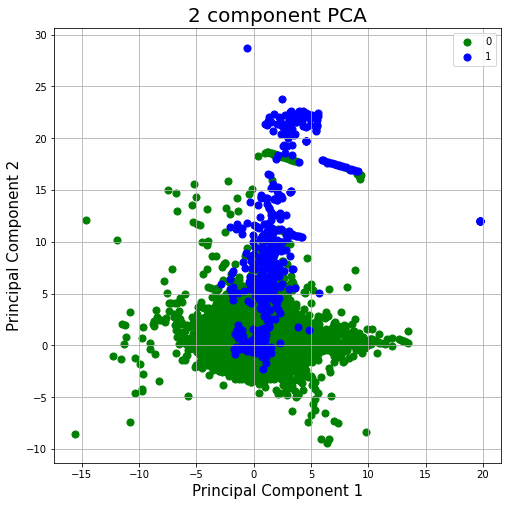

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC_1']
               , finalDf.loc[indicesToKeep, 'PC_2']
#              , finalDf.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
good_idx = finalDf['Class'] == 0
bad_idx = finalDf['Class'] == 1

good_data = finalDf.loc[good_idx]
bad_data = finalDf.loc[bad_idx]
print(good_data.shape)
print(bad_data.shape)

good_sampling = np.random.randint(len(good_data), size=200)
final_good = good_data.loc[good_data.index.values[good_sampling]].reset_index(drop=True)

bad_sampling = np.random.randint(len(bad_data), size=200)
final_bad = bad_data.loc[bad_data.index.values[bad_sampling]].reset_index(drop=True)

final = pd.concat([final_good, final_bad], axis=0)

from sklearn.utils import shuffle
final = shuffle(final).reset_index(drop=True)
print(final)

(284315, 3)
(492, 3)
         PC_1       PC_2  Class
0    0.166049  -0.415800      0
1    0.959359   5.088638      1
2    2.228830  22.094746      1
3    0.004123   5.401093      1
4    0.403141   0.107433      0
..        ...        ...    ...
395 -0.127230  -0.209708      0
396 -0.211004   4.117775      1
397  0.092443  -0.260135      1
398  2.317528   0.230972      1
399 -1.792219   4.360807      1

[400 rows x 3 columns]


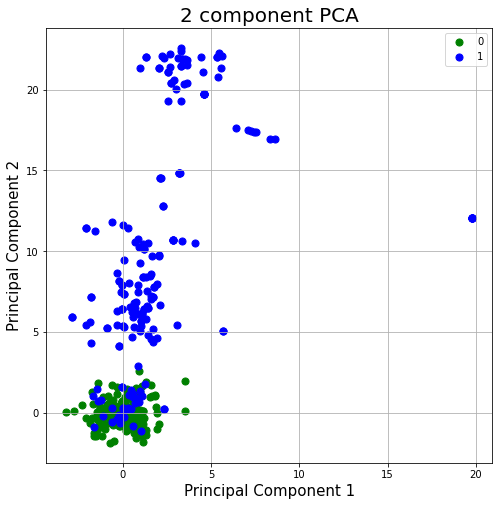

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['Class'] == target
    ax.scatter(final.loc[indicesToKeep, 'PC_1']
               , final.loc[indicesToKeep, 'PC_2']
#              , finalDf.loc[indicesToKeep, 'PC_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
X_train = final.values
# X_train = np.hstack((X_train[:,:-1], np.zeros((X_train.shape[0], 1)))) # padding to reach 3 dimensions
X_train = X_train[:,:-1]
label_angles = np.asarray([y if y==1 else -1 for y in final.loc[:,'Class']]).reshape(-1,1)
# X_train = np.hstack((X_train, label_angles))
new_y_train = np.ones(((X_train.shape[0], 1)))
print(X_train)

y_train = final.loc[:,'Class']

train_features = np.array(X_train)
train_targets = np.array(y_train).reshape([-1,1])

[[ 1.66049130e-01 -4.15799716e-01]
 [ 9.59358579e-01  5.08863832e+00]
 [ 2.22882954e+00  2.20947461e+01]
 [ 4.12297278e-03  5.40109285e+00]
 [ 4.03140817e-01  1.07433249e-01]
 [ 2.35462625e-01  2.53800017e-01]
 [ 1.07153350e+00  6.04627627e+00]
 [-5.38156483e-01 -3.34635935e-01]
 [ 1.38381980e-01  7.90187681e-01]
 [-1.43878353e+00 -1.02226951e+00]
 [-6.57641304e-02  1.61751917e+00]
 [ 4.17647400e-01  1.81390361e-01]
 [ 7.11534105e+00  1.75022851e+01]
 [-1.17481065e+00  1.90799869e-01]
 [ 3.12681509e-01  1.14307698e+01]
 [ 4.24038895e-01 -5.46306575e-01]
 [ 1.13342012e-01  7.88854068e-01]
 [-1.65808144e+00  1.08050802e+00]
 [ 2.10240987e+00  6.70014974e+00]
 [ 2.06055720e-01 -7.89880092e-01]
 [ 1.92983459e-01  4.56471213e-01]
 [ 6.02169267e-01  4.27569604e-01]
 [ 3.27467572e-01 -6.38907028e-01]
 [ 1.72824570e+00  4.42221659e+00]
 [-2.09637139e-01  8.18960124e+00]
 [ 1.84984215e+00  1.07544752e+00]
 [ 4.59032080e+00  1.97392595e+01]
 [ 2.07573971e+00  9.74559298e+00]
 [ 7.61476411e-01 -7

In [12]:
import random
from sklearn.utils import shuffle

t_good_idx = finalDf['Class'] == 0
t_bad_idx = finalDf['Class'] == 1

new_good_data = finalDf.loc[t_good_idx]
new_bad_data = finalDf.loc[t_bad_idx]

new_good_sampling = random.sample([i for i in range(len(new_good_data)) if i not in good_sampling],330)
new_final_good = new_good_data.loc[new_good_data.index.values[new_good_sampling]].reset_index(drop=True)

new_bad_sampling = [i for i in range(len(new_bad_data)) if i not in bad_sampling]
new_final_bad = new_bad_data.loc[new_bad_data.index.values[new_bad_sampling]].reset_index(drop=True)

new_final = pd.concat([new_final_good, new_final_bad], axis=0)
new_final = shuffle(new_final).reset_index(drop=True)

val_features = np.array(new_final.values[:,:-1])
val_targets = np.array(new_final.values[:,-1].reshape([-1,1]))

In [13]:
# Analyze class imbalance

print(train_targets.shape)
counts = np.bincount(train_targets[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(train_targets)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

(400, 1)
Number of positive samples in training data: 200 (50.00% of total)


In [14]:
# Normalize data

mean = np.mean(train_features, axis=0)
train_features -= mean
val_features -= mean
std = np.std(train_features, axis=0)
train_features /= std
val_features /= std

print(val_features.shape)

(660, 2)


In [20]:
# Build binary classif. model
# ! pip install tensorflow
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            3, activation="relu", input_shape=(train_features.shape[-1],)
        ),
#         keras.layers.Dense(256, activation="relu"),
#         keras.layers.Dropout(0.3),
#         keras.layers.Dense(256, activation="relu"),
#         keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train model with class_weight argument

metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
)

callbacks = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")]
class_weight = {0: weight_for_0, 1: weight_for_1}

history = model.fit(
    train_features,
    train_targets,
    batch_size=500,
    epochs=150,
    verbose=2,
    callbacks=callbacks,
    validation_data=(val_features, val_targets),
    class_weight=class_weight,
)

Epoch 1/150
1/1 - 3s - loss: 0.0032 - fn: 58.0000 - fp: 5.0000 - tn: 195.0000 - tp: 142.0000 - precision: 0.9660 - recall: 0.7100 - val_loss: 0.6324 - val_fn: 127.0000 - val_fp: 10.0000 - val_tn: 320.0000 - val_tp: 203.0000 - val_precision: 0.9531 - val_recall: 0.6152
Epoch 2/150
1/1 - 0s - loss: 0.0031 - fn: 58.0000 - fp: 5.0000 - tn: 195.0000 - tp: 142.0000 - precision: 0.9660 - recall: 0.7100 - val_loss: 0.6270 - val_fn: 122.0000 - val_fp: 9.0000 - val_tn: 321.0000 - val_tp: 208.0000 - val_precision: 0.9585 - val_recall: 0.6303
Epoch 3/150
1/1 - 0s - loss: 0.0031 - fn: 57.0000 - fp: 5.0000 - tn: 195.0000 - tp: 143.0000 - precision: 0.9662 - recall: 0.7150 - val_loss: 0.6222 - val_fn: 122.0000 - val_fp: 6.0000 - val_tn: 324.0000 - val_tp: 208.0000 - val_precision: 0.9720 - val_recall: 0.6303
Epoch 4/150
1/1 - 0s - loss: 0.0031 - fn: 58.0000 - fp: 5.0000 - tn: 195.0000 - tp: 142.0000 - precision: 0.9660 - recall: 0.7100 - val_loss: 0.6180 - val_fn: 120.0000 - val_fp: 5.0000 - val_tn: 

Epoch 31/150
1/1 - 0s - loss: 0.0024 - fn: 65.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 135.0000 - precision: 1.0000 - recall: 0.6750 - val_loss: 0.4726 - val_fn: 97.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 233.0000 - val_precision: 1.0000 - val_recall: 0.7061
Epoch 32/150
1/1 - 0s - loss: 0.0024 - fn: 65.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 135.0000 - precision: 1.0000 - recall: 0.6750 - val_loss: 0.4664 - val_fn: 96.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 234.0000 - val_precision: 1.0000 - val_recall: 0.7091
Epoch 33/150
1/1 - 0s - loss: 0.0023 - fn: 65.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 135.0000 - precision: 1.0000 - recall: 0.6750 - val_loss: 0.4604 - val_fn: 96.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 234.0000 - val_precision: 1.0000 - val_recall: 0.7091
Epoch 34/150
1/1 - 0s - loss: 0.0023 - fn: 64.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 136.0000 - precision: 1.0000 - recall: 0.6800 - val_loss: 0.4546 - val_fn: 96.0000 

Epoch 61/150
1/1 - 0s - loss: 0.0018 - fn: 37.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 163.0000 - precision: 1.0000 - recall: 0.8150 - val_loss: 0.3463 - val_fn: 70.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 260.0000 - val_precision: 1.0000 - val_recall: 0.7879
Epoch 62/150
1/1 - 0s - loss: 0.0017 - fn: 37.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 163.0000 - precision: 1.0000 - recall: 0.8150 - val_loss: 0.3437 - val_fn: 70.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 260.0000 - val_precision: 1.0000 - val_recall: 0.7879
Epoch 63/150
1/1 - 0s - loss: 0.0017 - fn: 37.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 163.0000 - precision: 1.0000 - recall: 0.8150 - val_loss: 0.3411 - val_fn: 70.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 260.0000 - val_precision: 1.0000 - val_recall: 0.7879
Epoch 64/150
1/1 - 0s - loss: 0.0017 - fn: 37.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 163.0000 - precision: 1.0000 - recall: 0.8150 - val_loss: 0.3387 - val_fn: 70.0000 

Epoch 91/150
1/1 - 0s - loss: 0.0015 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.2932 - val_fn: 64.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 266.0000 - val_precision: 1.0000 - val_recall: 0.8061
Epoch 92/150
1/1 - 0s - loss: 0.0014 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.2921 - val_fn: 64.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 266.0000 - val_precision: 1.0000 - val_recall: 0.8061
Epoch 93/150
1/1 - 0s - loss: 0.0014 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.2911 - val_fn: 64.0000 - val_fp: 0.0000e+00 - val_tn: 330.0000 - val_tp: 266.0000 - val_precision: 1.0000 - val_recall: 0.8061
Epoch 94/150
1/1 - 0s - loss: 0.0014 - fn: 36.0000 - fp: 0.0000e+00 - tn: 200.0000 - tp: 164.0000 - precision: 1.0000 - recall: 0.8200 - val_loss: 0.2900 - val_fn: 64.0000 

Epoch 122/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2716 - val_fn: 61.0000 - val_fp: 2.0000 - val_tn: 328.0000 - val_tp: 269.0000 - val_precision: 0.9926 - val_recall: 0.8152
Epoch 123/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2712 - val_fn: 61.0000 - val_fp: 2.0000 - val_tn: 328.0000 - val_tp: 269.0000 - val_precision: 0.9926 - val_recall: 0.8152
Epoch 124/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2708 - val_fn: 61.0000 - val_fp: 3.0000 - val_tn: 327.0000 - val_tp: 269.0000 - val_precision: 0.9890 - val_recall: 0.8152
Epoch 125/150
1/1 - 0s - loss: 0.0013 - fn: 35.0000 - fp: 1.0000 - tn: 199.0000 - tp: 165.0000 - precision: 0.9940 - recall: 0.8250 - val_loss: 0.2705 - val_fn: 61.0000 - val_fp: 3.0000 - val_t

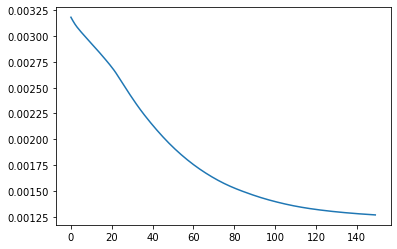

In [22]:
plt.plot(history.history['loss'])

In [23]:
predictions = model.predict(train_features)

thres_pred = []
threshold = 0.7
counts = 0 
tp=0
fn = 0
fp = 0
for (i,p) in enumerate(predictions):
    label = 0
    if p > threshold:
        label = 1
    else: 
        label = 0
    if label == train_targets[i]:
        counts +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    thres_pred.append(label)
print(counts/len(predictions))
print("tp: ", tp, "tn: ", counts-tp," fp: ", fp, " fn: ", fn)

0.895
tp:  158 tn:  200  fp:  42  fn:  0


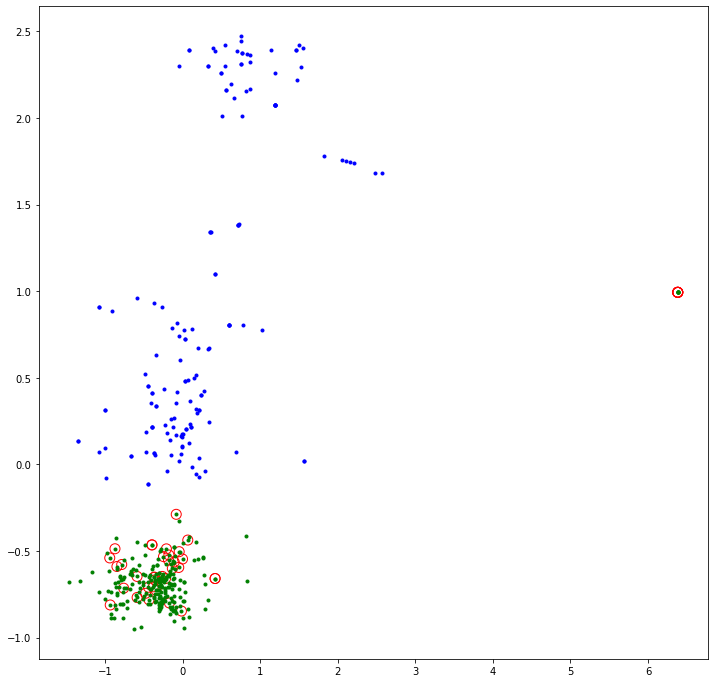

In [24]:
fig = plt.figure(figsize=(12,12))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for x, y_target, y_ in zip(train_features, train_targets, thres_pred):
    if y_ == 1:
        plt.plot(x[0], x[1], 'bo', markersize=3)
    else:
        plt.plot(x[0], x[1], 'go', markersize=3)
    if y_target != y_:
        plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)
plt.show()

In [25]:
predictions = model.predict(val_features)

thres_pred = []
threshold = 0.7
counts = 0 
tp=0
fn = 0
fp = 0
for (i,p) in enumerate(predictions):
    label = 0
    if p > threshold:
        label = 1
    else: 
        label = 0
    if label == val_targets[i]:
        counts +=1
        if label ==1: 
            tp +=1
    else:
        if label == 1:
            fn +=1
        else:
            fp +=1
    thres_pred.append(label)
print(counts/len(predictions))
print("tp: ", tp, "tn: ", counts-tp," fp: ", fp, " fn: ", fn)

0.8984848484848484
tp:  263 tn:  330  fp:  67  fn:  0


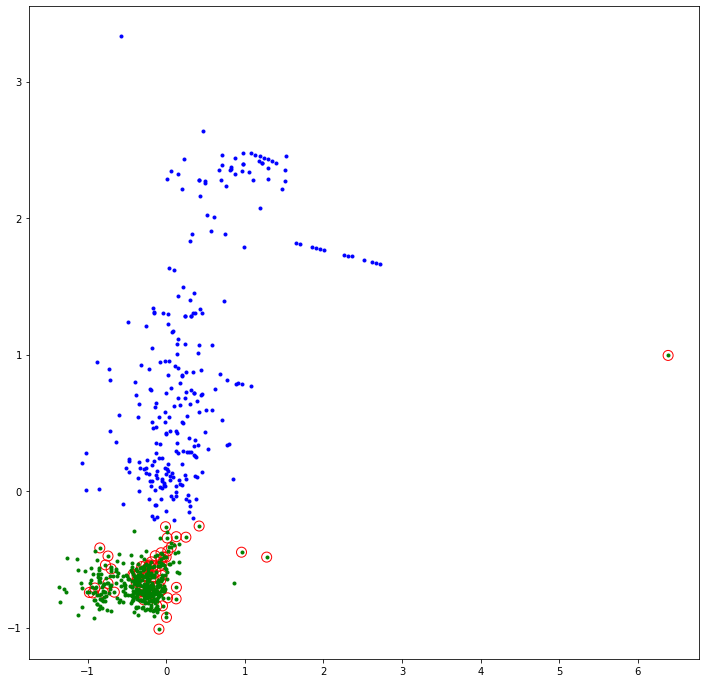

In [26]:
fig = plt.figure(figsize=(12,12))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for x, y_target, y_ in zip(val_features, val_targets, thres_pred):
    if y_ == 1:
        plt.plot(x[0], x[1], 'bo', markersize=3)
    else:
        plt.plot(x[0], x[1], 'go', markersize=3)
    if y_target != y_:
        plt.scatter(x[0], x[1], s=100, facecolors='none', edgecolors='r', linewidths=1)
plt.show()